## librairies de base

In [73]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


from matplotlib import pyplot as plt # afficher les données manquantes
import seaborn as sns

In [74]:
train_data = pd.read_csv("train.csv")
train_data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


La commande `.head()` permet d’avoir un aperçu des 5 premières lignes du tableau. Cela permet par exemple de vérifier que l’import de votre table c’est bien déroulé.

 Les lignes suivantes permettent d’afficher le pourcentage de femmes et d’hommes qui ont survécus. On peut voir grâce à ces résultats que le sexe de la personne est une caractéristique importante pour déterminer si une personne a survécu ou non.

In [76]:
femme = train_data.loc[train_data.Sex == 'female']['Survived']
ratio_femme = sum(femme)/len(femme)

print('% de femmes qui ont survécus :', ratio_femme)

homme = train_data.loc[train_data.Sex == 'male']['Survived']
ratio_homme = sum(homme)/len(homme)

print('% de femmes qui ont survécus :', ratio_homme)

% de femmes qui ont survécus : 0.7420382165605095
% de femmes qui ont survécus : 0.18890814558058924


La commande `sum(femme)` calcule le nombre de femmes qui ont survécus (le nombre de 1 dans le tableau), `len(femme)` est le nombre total de femme. D’où le calcul pour la ratio

En data science les données parfaites n’existent pas. Vous avez toujours du bruit et des imprécisions. Un modèle fait de l’overfitting lorsqu’il commence à apprendre ce bruit. Il en résulte un modèle biaisé qui est impossible à généraliser

---
---

## Comment éviter l’overfitting ?

### Cross-validation

Une des méthodes les plus efficaces pour éviter l’overfitting est la **cross validation** (**validation croisée** en français).

Contrairement à la validation classique, ou l’on divise les données en deux, en cross validation on divise les données d’entraînements en plusieurs groupes. L’idée est ensuite d’entraîner le modèle sur tous les groupes sauf un. Si on a k groupes, on entraînera le modèle k fois avec à chaque fois un nouveau groupe de test. Cette technique de validation croisée est appelée **k-fold**.

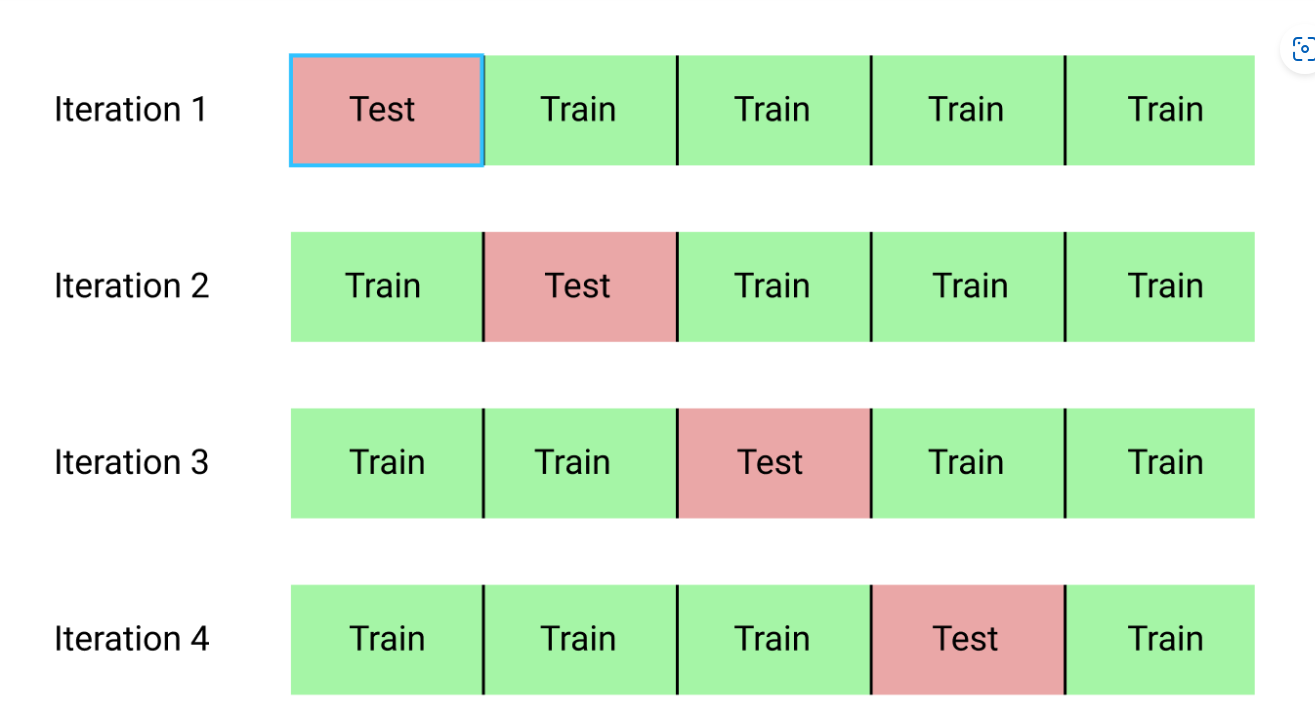

Bon j’avoue je vous vends du rêve avec la validation croisée 🙂

k-fold est surtout utilisée pour évaluer les performances d’un modèles. Cette technique permet de sélectionner les bons modèles de machine learning. Lorsqu’il s’agit d’éviter l’overfitting, cette méthode interviendra surtout pour le détecter plus efficacement.

### Retirer des features

Une des techniques pour améliorer les performances d’un modèle de machine learning est de sélectionner correctement les features (les variables que l’on considère pour l’entraînement du modèle).

L’idée est de retirer toutes les features qui n’apportent rien. Si deux variables sont corrélées par exemple, mieux vaut en retirer une. Si une variable a une variance trop faible, elle n’impacte pas le phénomène étudié mais peut fausser les résultats.

De cette façon on simplifie au maximum nos données, on améliore les performances du modèle et on réduit au passage les risques d’overfitting.

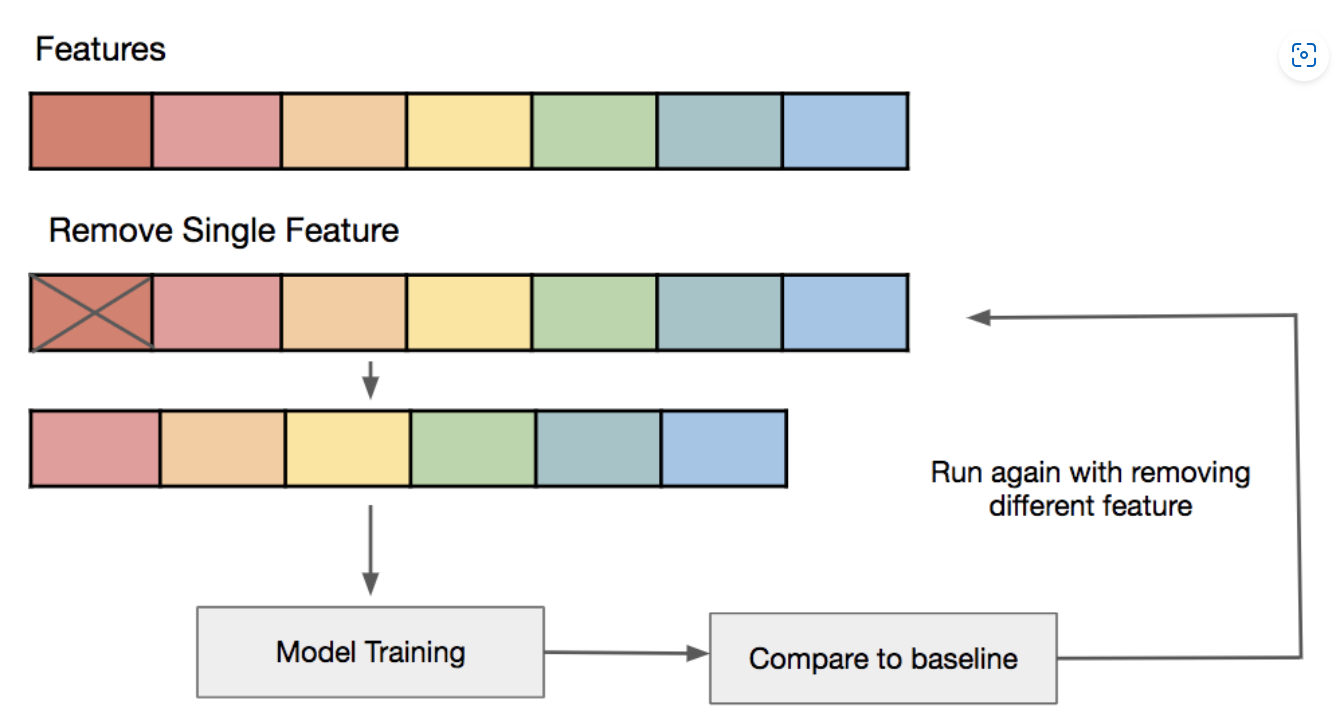

Une des façons de faire ça est d’entraîner le modèle plusieurs fois. A chaque fois on retire une des features et on étudie l’impact sur l’entraînement du modèle. Cette technique ne peut être utilisée que sur des données avec un nombre de features plutôt faible.

### Méthodes de régularisations

Les méthodes de régularisations sont des techniques qui permettent de réduire la complexité globale d’un modèle de machine learning. Elles permettent de réduire la variance et ainsi réduisent les risques d’overfitting.

Voyez cette exemple pour une régression logistique. On voit qu’avant régularisation le modèle faisait de l’overfitting. La régularisation résout le problème dans ce cas.

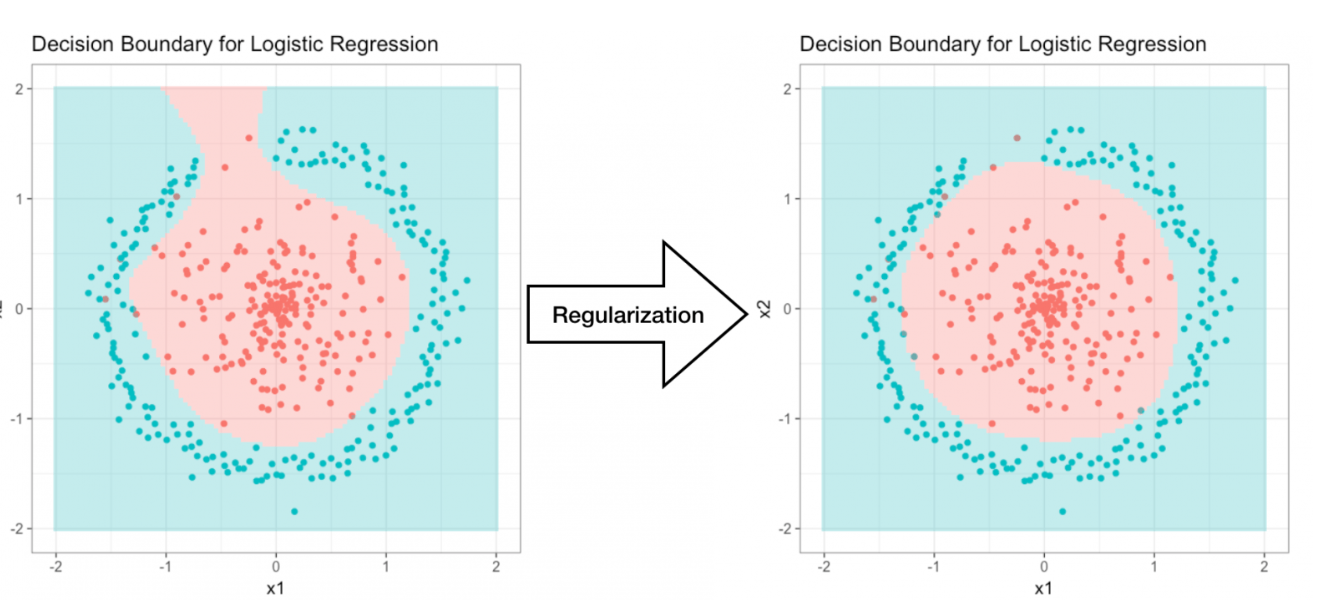

Les méthodes de régularisations permettent de réduire considérablement la variance du modèle sans que le biais n’augmente beaucoup. Nous reparlerons du dilemme **biais/variance** dans la dernière partie.

De nombreuses techniques de régularisations existent :

- Régularisation L1
- Ridge
- Régularisation L2
- Lasso

## Commencer par concevoir des modèles simples
Plus votre modèle est simple, plus vous éviterez l’overfitting. La majorité des applications peuvent être résolues de façon satisfaisante avec des modèles simples.

C’est d’ailleurs un conseil que je vous donne, commencez toujours par construire des modèles simples. Il est inutile d’entraîner un réseau de neurones à plusieurs couches, lorsqu’un modèle statistique simple donne de bons résultats.

### L’early stopping

L’early stopping est une technique très intuitive. Elle consiste simplement à arrêter l’entraînement avant que le modèle ne commence à overfitter.

L’early stopping permet aussi de détecter lorsque le modèle utilisé n’est pas adaptée, si on voit que le modèle commence à overfitter alors que les performances sont trop faibles, c’est qu’on doit changer de méthode.


---
---

À présent, nous devons construire le modèle à proprement parler. Nous allons utiliser un algorithme de type **random forest**. L’image ci-dessous permet de comprendre le fonctionnement de l’algorithme :

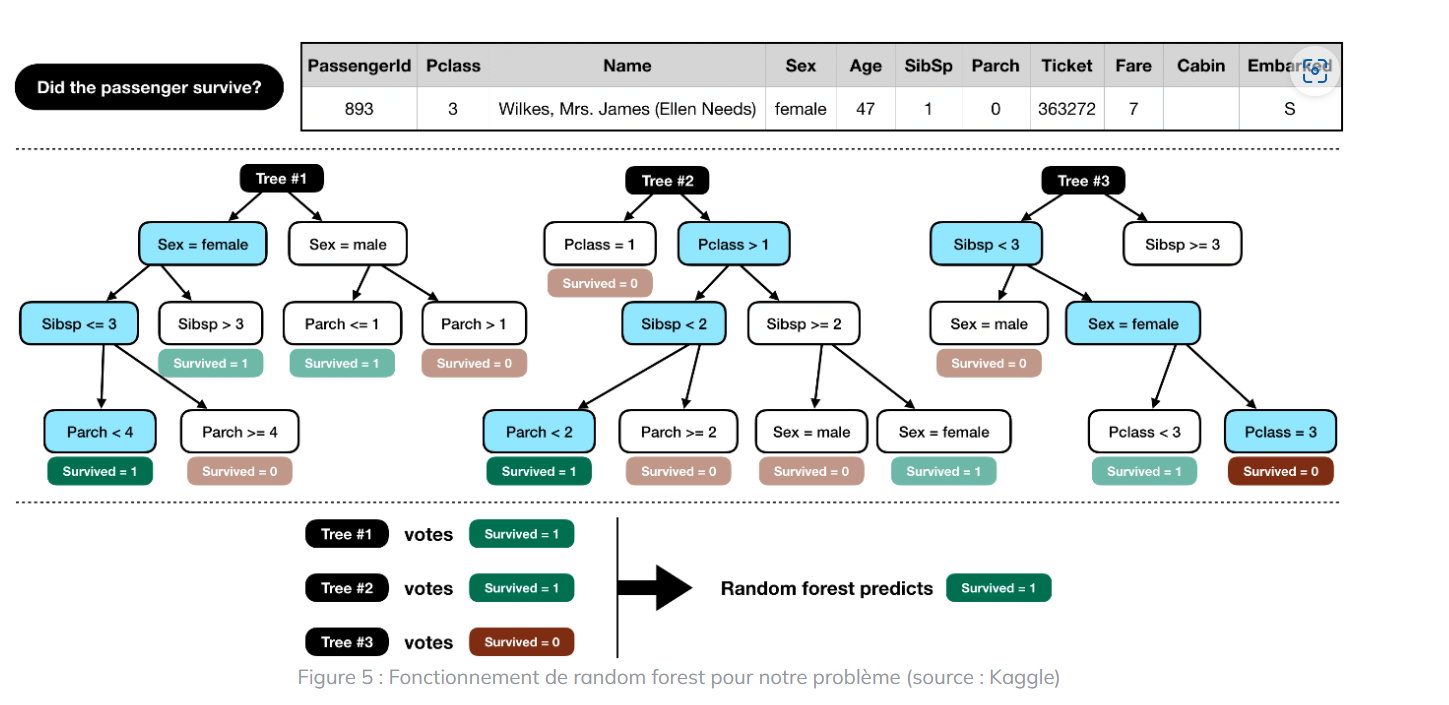

Les arbres représentés, sont ce que l’on appelle des **arbres binaires de décisions**. À chaque nœud de l’arbre on doit aller à droite ou à gauche suivant les caractéristiques de l’individu en question. Sur cette image, uniquement 3 arbres sont représentés, dans notre code nous allons le faire pour 100 arbres.

On récupère les résultats pour chaque arbre (Survived=1 ou Survived=0) puis on fait notre prédiction de façon **démocratique** (vote majoritaire) pour chacune des deux options. Si plus de 51 arbres sur les 100 au total prédisent Survived, notre prédiction sera de dire que le passager a survécu.

In [77]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [78]:
y = train_data['Survived']

features = ['Pclass','Sex','SibSp','Parch']
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5,      random_state = 1)
model.fit(X_train, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId' : test_data.PassengerId, 'Survived': predictions})
print(output.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


Dans `model`, on crée 100 arbres. Leur profondeur maximale est de 5 puisque l’on considère 4 features.

C’est ensuite dans `model.fit()` que tous se joue. C’est là que notre modèle paramètre l’arbre pour que les résultats collent du mieux possible avec nos données d’entrainement.

**Random forest est un algorithme avec une forte interprétabilité**

Un des grands défis du machine learning ces dernières années est l’explicabilité (ou interprétabilité) des modèles.

On a d’ailleurs un dilemme entre efficacité et explicabilité des modèles. Souvent les modèles les plus efficaces, comme les réseaux de neurones avec le deep learning, sont les moins explicables.

Random Forest est une solution plus que crédible pour ce dilemme. Son efficacité est assez bonne et on a des techniques pour interpréter les résultats. On peut par exemple déterminer quelles sont les features qui ont été déterminantes pour l’obtention d’une prédiction. Random forest offre une meilleur transparence sur l’utilisation faites des données d’entrainement.

Finalement, random forest présente l’avantage d’utiliser plus intelligemment l’ensemble de ses données initiales, afin de limiter ses erreurs. Toutefois, l’algorithme ne pourra jamais être à 100% fiable (il faudrait disposer d’une infinité d’arbres) et perd de la simplicité de notre arbre de décision seul.

Malgré tout, cela reste l’un des classifieurs les plus efficaces et les plus utilisés de nos jours (en témoigne son utilisation pour la classification d’images de la Kinect ou son utilisation dans le tutoriel Kaggle pour prédire qui sont les survivants du naufrage du Titanic, par exemple).

## Être dans le top 10% d’une compétition Kaggle facilement

### Comprendre les données

#### charge donc les données et on les affiche


In [79]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Analyser les données

Dans un premier temps, on regarde la **structure de nos données** :

- **PassengerId**, le numéro du passager
- **Survived**, si 1 le passager a survécu, 0 sinon (ce sont les données que nous devons prédire)
- **Pclass**, la classe du passager 1 étant la meilleur, 3 la moins bonne
- **Name**, le nom du passager
- **Sex**, le sexe de l’individu
- **Age**, l’âge du passager
- **SibSp**, nombre de frère et sœur du passager à bord du Titanic
- **Parch**, nombre de parents du passager à bord du Titanic
- **Ticket**, le numéro du Ticket
- **Fare**, prix du Ticket
- **Cabin**, le numéro de cabine
- **Embarked**, port d’embarcation C pour Cherbourg, Q pour Queenstown, S pour Southampton

pour plus de commodités, on sépare la **colonne à prédire Survived** des autres colonnes de note dataset.

In [81]:
train_targets = train_data[['Survived']]
train_data = train_data.drop('Survived', axis = 1)

Avant d’effectuer le preprocessing **on rassemble les données d’entraînement et de test** dans un même dataset pour que la **transformation** s’applique sur toute nos données.

In [82]:
data = pd.concat([train_data, test_data])

## Processing des données

### Transformation

Vient l’étape **la plus importante** du Machine Learning : **le preprocessing**.

Le **preprocessing** consiste à **transformer les données** pour que **le modèle de Machine Learning** puisse les ingurgiter, **les comprendre**.

Ici quelques données nous **posent problèmes**, ce sont les **données catégorielles** (par opposition aux données numériques).

Par exemple la colonne **Embarked**. Elle n’a pas de données chiffrées. Au contraire, elle possède **des catégories** :

- Cherbourg
- Queenstown
- Southampton

Il faut **transformer ces données en chiffres** pour que le modèle de Machine Learning puissent les comprendre, **les interpréter**.

Pour cela on utilise le **One-Hot Encoding**.

---
Le **One-Hot Encoding** est à la fois la **méthode la plus connu**, la plus **simple à réaliser**, et celle qui m’a permis d’avoir la **meilleure précision** dans la plupart de **mes travaux personnels en NLP**.

Le **One-Hot** consite à créer un dictionnaire avec toutes les **modalités**.

Ce dictionnaire est en fait un tableau où chaque colonne représente **une modalité** et chaque ligne représente une phrase.

Si tel modalité correspond à tel observation, on met une valeur de 1 dans l’élément du tableau, sinon on met une valeur de 0.

---


La librairie pandas nous offre une manière simple et rapide d’effectuer le One-Hot Encoding : la fonction `get_dummies()`.

Elle **transforme une colonne** d’un dataframe en **plusieurs colonnes One-Hot encoded**.

Par exemple, avec la colonne **Embarked**, on a **trois catégories**. Eh bien `get_dummies()` va créer trois colonnes qui représenteront chacune une catégorie.

On aura donc une colonne pour **Cherbourg**, une pour **Queenstown** et une autre pour **Southampton**.

Si un **passager** a embarqué à **Cherbourg un 1** sera inscrit dans cette colonne et un **0 dans les autres**. Cela pour chaque passager selon le port embarqué.

Concrétement, voilà ce que ça donne :

In [83]:
pd.get_dummies(data["Embarked"]).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


Cela veut dire que le passager numéro 0 à embarquer à Southampton, le numéro 1 à Cherbourg le numéro 2 à Southampton etc.

On va appliquer ce One-Hot Encoding sur les colonnes que l’on estime importante pour déterminer si une personne à survécu ou non.

On choisit ici :

- **Embarked**
- **Sex**
- **Cabin**

In [84]:
features = ["Embarked", "Sex", "Cabin"]
new_data = pd.get_dummies(data[features])
new_data.head()

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_A10,Cabin_A11,Cabin_A14,Cabin_A16,Cabin_A18,...,Cabin_F E57,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


En plus de ces données catégorielles processées, on ajoute les données chiffrées importantes.

In [85]:
new_data = pd.concat([new_data,data[['Pclass', 'Age', 'SibSp', 'Parch']]], axis = 1)

In [86]:
new_data.head(2)

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_A10,Cabin_A11,Cabin_A14,Cabin_A16,Cabin_A18,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Pclass,Age,SibSp,Parch
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,3,22.0,1,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,38.0,1,0


Il y a aussi d’autres types de donnés qui sont ni **chiffrées**, ni **catégoriques**. Par exemple la colonne **Ticket** est une **chaîne de caractère** indiquant le **numéro de ticket** du passager.

Pour le coup, c’est typiquement une donnée qui ne nous indiquera pas si le passager survivra ou non. Au contraire, le numéro de ticket agit plutôt **comme PassengerId**, un numéro qui permet de **différencier un passager d’un autre**.

Pas besoin dans ce cas de le prendre en compte.


Une **vérification intéressante** néanmoins est de voir si notre dataset est **totalement rempli**, s’il n’y a **pas de valeur manquante**.

On peut utiliser les librairies *matplotlib* et *seaborn* pour cela.

Elles permettent de nous **afficher* joliement où se trouvent nos **données manquantes** (les lignes jaunes).

Dans notre cas, elles sont au niveau de la colonne **Age** et **Cabin**. Par ailleurs, il y a beaucoup de données manquantes dans cette dernière.

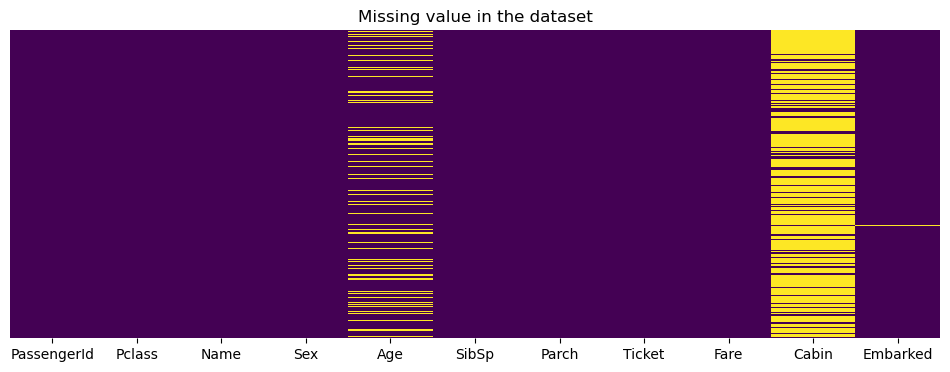

In [87]:


plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

On utilise alors la fonction *fillna(0)* qui **remplace** tous les **NaN par 0**. Cela permettra ainsi à notre modèle de Machine Learning de **comprendre que ces valeurs sont nulles**.

In [88]:
new_data = new_data.fillna(0)
new_data.head(3)

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_A10,Cabin_A11,Cabin_A14,Cabin_A16,Cabin_A18,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Pclass,Age,SibSp,Parch
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,3,22.0,1,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,38.0,1,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,3,26.0,0,0


Il est temps de **séparer à nouveau** ces datasets pour utiliser le **premier pour l’entraînement** du modèle et le **deuxième pour la prédiction**.

In [89]:
X_train = new_data[:len(train_data)]
X_test = new_data[len(train_data):]

**y_train** contenant la **colonne a prédire**, **Survived**, **sous forme d’array** et non de Dataframe. y_train doit être sous cette forme pour **effectuer du Machine Learning**.

In [90]:
y_train = train_targets.values.ravel()

## Prédire avec le Machine Learning

### Créer un modèle

Pour ce jeux de données nous allons utilisé une Forêt **d’Arbres de Décision** aussi appelé **Random Forest**.

On utilise ici la **librairie** *sklearn* pour initialiser un **Random Forest**.

La fonction *RandomForestClassifier()* a trois paramètres principaux :

- **n_estimators**, le nombre d’Arbres de Décision
- **max_depth**, la profondeur maximale d’un arbre (None si on ne veut pas de limite prédéfinie)
- **random_state**, permet de contrôler l’aspect aléatoire du Random Forest (la séparation du jeu de données pour l’entraînement des Arbres de Décision)

In [91]:
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=3)

 on **entraîne notre modèle** de Random Forest à **prédire les données y_train** en fonction des données x_train.

In [92]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=3)

### évaluer le modèle

On **évalue la précision** de notre modèle avec la **validation croisée** qui sépare notre jeu de données en **K sous-ensemble**, K sous-groupe. Le modèle s’entraîne sur K-1 sous-ensemble et **évalue sa précision sur le Kème**.

Pour cela, on utilise la fonction *cross_val_score()* de *sklearn* où il faut indiquer le modèle à évaluer, les données et cv le nombre de sous-ensemble.

In [93]:
from sklearn.model_selection import cross_val_score
from statistics import mean

scores = cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.72067039, 0.79775281, 0.82022472, 0.78651685, 0.8258427 ])

In [94]:
print(mean(scores))

0.7902014939426276


### Améliorer le modèle

La deuxième **étape la plus importante** du Machine Learning est **l’amélioration du modèle**.

Une fois qu’on a **réussi** à faire une prédiction, à trouver un **modèle statistique** pour interpréter nos données, on doit **l’optimiser**.

Pour cela, il n’y a qu’**une seule méthode** : la pratique. **On ne l’entendra jamais assez** mais le Machine Learning **c’est avant tout de la pratique**.

**Tester différentes approches**, retirer certaines données, en ajouter d’autres, **expérimenter différentes combinaisons**, **changer les paramètres** du modèle de Machine Learning, voir même **changer de modèle** de Machine Learning.

Bref ! On l’aura compris.. il faut explorer par nous même tous ces facteurs pour trouver la configuration qui convient le mieux à nos données.


La configuration actuelle finalement m’a permis d’avoir une précision de 0.79186 et d’être dans le top 9% !

On peut encore faire mieux ! Explorez, expérimentez et testez par vous-même pour trouver la meilleure solution !

Une fois qu’on a testé **plusieurs approches** et que **le modèle nous satisfait** on peut l’utiliser sur les données à prédire **X_test**.

In [95]:
predictions = model.predict(X_test)

On transforme cette prédiction en **DataFrame** :

In [96]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

In [97]:
output.to_csv('my_submission.csv', index=False)

## Entraîner des modèles avec la Cross Validation

La Cross Validation est un moyen d’assurer que notre modèle de Machine Learning est au maximum de ses capacités.

Il y a seulement 4 étapes pour réaliser une Cross Validation :

créer 5 sous-groupes de notre dataset
entraîner un modèle sur 4 sous-groupes
évaluer le modèle sur le dernier sous-groupes
répéter les étapes 2 et 3 pour que tous les sous-groupes soient évalués
Ici, la Cross Validation nous donnera, en bout de chaîne, 5 modèle de Machine Learning différent.

Cette multiplicité de modèle va nous permettre d’avoir une diversité dans les prédictions finales.

En fait, la Cross Validation permet d’avoir l’avis de 5 experts (5 modèle) au lieu d’un seul.

Tout d’abord je vous propose de diviser notre dataset en deux :

- Les données pour la Cross Validation, qu’on appellera `train_test`
- Les données pour tester les modèles finaux, qu’on appellera `gtest` pour global test

Pour que ces sous-groupes aient tous une distribution équitable, on mélange tout d’abord le dataset grâce à la fonction `sample(frac=1)`:

In [102]:
df = train_data.sample(frac=1).reset_index(drop=True)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,133,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
1,682,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C
2,554,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C
3,543,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
4,241,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C


`reset_index(drop=True)` permet de réinitialiser l’index de chaque ligne après le mélange.

Ensuite, on prépare nos features (X) et label (Y) pour la Cross Validation :

In [113]:
X = X_train
y = y_train

In [114]:
from sklearn import tree

decisionTree = tree.DecisionTreeClassifier()

In [115]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(decisionTree, X, y, cv=10)

Pour cette évaluation on a choisis de faire une Cross Validation sur 10 sous-groupes en indiquant cv=10.

Cela nous permet d’entraîner 10 modèles différents de Decision Tree.

On affiche le résultat de ces 10 modèles :



In [116]:
scores

array([0.73333333, 0.75280899, 0.76404494, 0.82022472, 0.79775281,
       0.79775281, 0.82022472, 0.7752809 , 0.85393258, 0.78651685])

In [117]:
scores.mean()

0.7901872659176029

Remarque : Nous n’avons pas besoin de données train et test. Effectivement dans la Cross Validation, chaque sous-groupe est utilisé une fois pour le test et N-1 fois pour l’entraînement. Il n’est donc pas nécessaire d’indiquer le train et le test car tous les sous-groupes passent par ces étapes.

Pour séparer notre dataset on utilise la fonction `train_test_split `(`gtest`sera composé de 10% de notre dataset) :

In [118]:
from sklearn.model_selection import train_test_split

X_train_test, X_gtest, y_train_test, y_gtest = train_test_split(X, y, test_size=0.10)

On peut initialiser notre classificateur :

In [119]:
from sklearn import tree

decisionTree = tree.DecisionTreeClassifier()

Et maintenant on peut implémenter la VRAIE Cross Validation.

Pour cela, c’est simple, on utilise la fonction cross_validate.

Cette fonction retourne plusieurs informations:

- `fit_time` – la durée d’entraînement pour les N modèles
- `test_score` – la précision des N modèles
- `score_time` – la durée de scoring pour les N modèles
- `estimator` (lorsque `return_estimator=True`) – les N modèles entraînés

In [120]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(decisionTree, X_train_test, y_train_test, cv=10, return_estimator=True)

In [121]:
cv_results['test_score']

array([0.72839506, 0.825     , 0.8125    , 0.7375    , 0.8       ,
       0.8125    , 0.7       , 0.8375    , 0.8125    , 0.775     ])

In [122]:
cv_results['test_score'].mean()

0.7840895061728396

Pour mesurer notre Cross Validation, on va parcourir chacun de nos modèles (stockés dans la variable cv_results['estimator']) et calculer le score pour X_gtest et y_gtest :

In [148]:
gtest_score = []
for i in range(len(cv_results['estimator'])):
  val_score.append(cv_results['estimator'][i].score(X_gtest, y_gtest))

NameError: name 'val_score' is not defined

In [124]:
sum(gtest_score) / len(gtest_score)

ZeroDivisionError: division by zero

In [125]:
from sklearn import datasets
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_notebook
import ipywidgets as widgets
from IPython.display import display, clear_output
output_notebook()
 
"""Load Iris dataset and transform the pandas DataFrame"""
iris = datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
 
"""Define callback function for the UI"""
def var_dropdown(x):
    """This function is executed when a dropdown value is changed.
    It creates a new figure according to the new dropdown values."""
    p = create_figure(
    x_dropdown.children[0].value,
    y_dropdown.children[0].value,
    data)
    fig[0] = p
     
    for species, checkbox in species_checkboxes.items():
        check = checkbox.children[0].value
        fig[0].select_one({'name': species}).visible = check
     
    with output_figure:
        clear_output(True)
        show(fig[0])
    fig[0]=p
     
    return x
 
def f_species_checkbox(x, q):
    """This function is executed when a checkbox is clicked.
    It directly changes the visibility of the current figure."""
    fig[0].select_one({'name': q}).visible = x
    with output_figure:
        clear_output(True)
        show(fig[0])
    return x
 
def create_figure(x_var, y_var, data):
    """This is a helper function that creates a new figure and 
    plots values from all three species. x_var and y_var control
    the features on each axis."""
    species_colors=['coral', 'deepskyblue', 'darkblue']
    p = figure(title="",
               x_axis_label=x_var,
               y_axis_label=y_var)
    species_nr = 0
    for species in iris['target_names']:
        curr_dtps = data['target'] == species_nr
        circle = p.circle(
            data[x_var][curr_dtps],
            data[y_var][curr_dtps],
            line_width=2,
            color=species_colors[species_nr],
            name=species
            )
        species_nr += 1
    return p
 
# The output widget is where we direct our figures
output_figure = widgets.Output()
 
# Create the default figure
fig = []  # Storing the figure in a singular list is a bit of a 
          # hack. We need it to properly mutate the current
          # figure in our callbacks.
p = create_figure(
    iris['feature_names'][0],
    iris['feature_names'][1],
    data)
fig.append(p)
with output_figure:
    show(fig[0])
 
# Checkboxes to select visible species.
species_checkboxes = {}
for species in iris['target_names']:
    curr_cb = widgets.interactive(f_species_checkbox,
                                  x=True,
                                  q=widgets.fixed(species))
    curr_cb.children[0].description = species
    species_checkboxes[species] = curr_cb
     
"""Create the widgets in the menu"""
# Dropdown menu for x-axis feature.
x_dropdown = widgets.interactive(var_dropdown,
                                 x=iris['feature_names']);
x_dropdown.children[0].description = 'x-axis'
x_dropdown.children[0].value = iris['feature_names'][0]
 
# Dropdown menu for y-axis feature.
y_dropdown = widgets.interactive(var_dropdown,
                                 x=iris['feature_names']);
y_dropdown.children[0].description = 'y-axis'
y_dropdown.children[0].value = iris['feature_names'][1]
 
 
 
# This creates the menu 
menu=widgets.VBox([x_dropdown,
                   y_dropdown,
                   *species_checkboxes.values()])
 
"""Create the full app with menu and output"""
# The Layout adds some styling to our app.
# You can add Layout to any widget.
app_layout = widgets.Layout(display='flex',
                flex_flow='row nowrap',
                align_items='center',
                border='none',
                width='100%',
                margin='5px 5px 5px 5px')
 
# The final app is just a box
app=widgets.Box([menu, output_figure], layout=app_layout)
 
# Display the app
display(app)

Loading BokehJS ...

Box(children=(VBox(children=(interactive(children=(Dropdown(description='x-axis', options=('sepal length (cm)'…

In [147]:
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Age of the captain'), IntSlider(min=40, max=60)], layout=form_item_layout),
    Box([Label(value='Egg style'), 
         Dropdown(options=['Scrambled', 'Sunny side up', 'Over easy'])], layout=form_item_layout),
    Box([Label(value='Ship size'), 
         FloatText()], layout=form_item_layout),
    Box([Label(value='Information'), 
         Textarea()], layout=form_item_layout)
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
form

Box(children=(Box(children=(Label(value='Age of the captain'), IntSlider(value=40, max=60, min=40)), layout=La…